<a href="https://colab.research.google.com/github/Reem-KR/GEOL-558_Supervised_Regression_Project/blob/main/Temperature_Analysis_Supervised_Regression_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Temperature Analysis -Predicting Temperature Change**

Reem Alrowaished

February 13 2025

## Introduction:

With increasing concerns about global warming and climate change, the goal of this project is to use global temperature data from 1961 to 2023 to predict temperature changes. This dataset, reflecting both seasonal and long-term global climate patterns, is crucial for forecasting temperature extremes, evaluating climate policies, and understanding the trajectory of global warming.

Using supervised regression techniques, I aim to build a model that can predict future temperature changes based on historical data. The insights gained will help better understand potential future climate scenarios and contribute to informed decision-making on climate-related issues.

Dataset Source: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository

## Section 1: Overview and Data Cleaning

In [1]:
# Import libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the Dataset file from Github
url = "https://raw.githubusercontent.com/Reem-KR/GEOL-558_Supervised_Regression_Project/main/Temp_data_3.csv"

# Read the CSV file from GitHub and create a dataframe
original_data = pd.read_csv(url)

# Show the first 5 rows
original_data.head(5)

,Domain,Area,Element Code,Element,Months,Year,Unit,Value,Flag Description
0,Temperature change on land,Afghanistan,7271,Temperature change,January,1961,°c,0.745,Estimated value
1,Temperature change on land,Afghanistan,7271,Temperature change,January,1962,°c,0.015,Estimated value
2,Temperature change on land,Afghanistan,7271,Temperature change,January,1963,°c,2.706,Estimated value
3,Temperature change on land,Afghanistan,7271,Temperature change,January,1964,°c,-5.250,Estimated value
4,Temperature change on land,Afghanistan,7271,Temperature change,January,1965,°c,1.854,Estimated value


In [3]:
# Check the number of rows and columns of the dataframe
rows, columns = original_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 241893
The number of columns is: 9


In [4]:
# Information of the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241893 entries, 0 to 241892
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain            241893 non-null  object 
 1   Area              241893 non-null  object 
 2   Element Code      241893 non-null  int64  
 3   Element           241893 non-null  object 
 4   Months            241893 non-null  object 
 5   Year              241893 non-null  int64  
 6   Unit              241893 non-null  object 
 7   Value             231633 non-null  float64
 8   Flag Description  241893 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 16.6+ MB


The code above provides a summary of the dataset in terms of its structure and the types of data it contains.

In [5]:
# Check for missing data in the entire dataset
missing_data = original_data.isnull().sum()
missing_data

,0
Domain,0
Area,0
Element Code,0
Element,0
Months,0
Year,0
Unit,0
Value,10260
Flag Description,0


From the code above, I can see that the change in temperature value column, which is critical for this project, is missing a lot of data, so I need to delete the missing rows. Also, I do not need the Element Code column, so I will delete that as well.

In [6]:
# Drop the 'Element Code' column
clean_data = original_data.drop(columns=['Element Code'])

# Drop the rows with missing values in the 'Value' column
clean_data = clean_data .dropna(subset=['Value'])

# Show the first 5 rows of the cleaned dataset
clean_data.head(5)

,Domain,Area,Element,Months,Year,Unit,Value,Flag Description
0,Temperature change on land,Afghanistan,Temperature change,January,1961,°c,0.745,Estimated value
1,Temperature change on land,Afghanistan,Temperature change,January,1962,°c,0.015,Estimated value
2,Temperature change on land,Afghanistan,Temperature change,January,1963,°c,2.706,Estimated value
3,Temperature change on land,Afghanistan,Temperature change,January,1964,°c,-5.250,Estimated value
4,Temperature change on land,Afghanistan,Temperature change,January,1965,°c,1.854,Estimated value


In [7]:
# Checking the Unit column for consistency
clean_data['Unit'].unique()

array(['°c'], dtype=object)

Above, I am making sure that the Unit column is consistent and that I do not have different units for the change in temperatures.

In [8]:
# Checking the Months column
clean_data['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

Above, I am trying to understand the month column and identify if there are any unexpected values that may need to be cleaned. I found that there are some inconsistencies like standard month names and non-standard time periods, so I need to adjust that in the following codes.

In [9]:
# Delete rows where 'Months' is 'Meteorological year'
clean_data = clean_data[clean_data['Months'] != 'Meteorological year']

In [10]:
# Define a mapping for non-standard time periods
month_mapping = {
    'Dec–Jan–Feb': 'Winter',
    'Mar–Apr–May': 'Spring',
    'Jun–Jul–Aug': 'Summer',
    'Sep–Oct–Nov': 'Fall',
}

# Replace the non-standard months with the defined mapping
clean_data['Months'] = clean_data['Months'].replace(month_mapping)

# Check the unique values in the 'Months' column again
clean_data['Months'].unique()


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Winter',
       'Spring', 'Summer', 'Fall'], dtype=object)

To ensure consistency and make the data easier to work with, I am mapping non-standard periods to standard categories. For example, replacing the non-standard time periods (Dec–Jan–Feb) with simpler, more consistent labels like Winter.

In [11]:
# Information of the dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218026 entries, 0 to 241829
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain            218026 non-null  object 
 1   Area              218026 non-null  object 
 2   Element           218026 non-null  object 
 3   Months            218026 non-null  object 
 4   Year              218026 non-null  int64  
 5   Unit              218026 non-null  object 
 6   Value             218026 non-null  float64
 7   Flag Description  218026 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.0+ MB


Above, I want to double-check and ensure the row count is consistent with each column and there are no missing values anymore.

In [12]:
# Understanding the dataset
clean_data.describe()

,Year,Value
count,218026.000000,218026.000000
mean,1992.576055,0.542308
std,18.167942,1.076798
min,1961.000000,-9.272000
25%,1977.000000,-0.054000
50%,1993.000000,0.468000
75%,2008.000000,1.067000
max,2023.000000,11.753000


The above function was used to compute summary statistics, such as the mean, standard deviation, minimum, and maximum values for the numerical columns (Year and Value) in the dataset. This step is fundamental to understand the data's central tendency and spread. I can see that the dataset starts from the year 1961 to 2023. Also, the minimum change in temperature is -9, and the maximum change in temperature is 11.75.

In [13]:
# Check the number of rows and columns of the clean data
rows, columns = clean_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 218026
The number of columns is: 8


## Section 2: Visualization

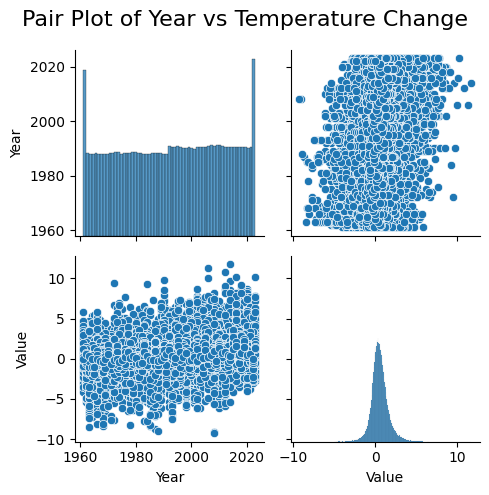

In [14]:
# Figure 1:

# Create a pair plot for selected columns to show the relationship between the year and Temperature value
grid = sns.pairplot(clean_data, vars=['Year', 'Value'])

# Add a title
plt.suptitle('Pair Plot of Year vs Temperature Change', size=16)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 1:**

The pair plot shows the relationship between the year and temperature change (Value) in the dataset. The histogram on the top-left indicates that most of the data spans from 1960 to 2020, with two noticeable spikes in data points around 1960 and 2020. The spike at 1960 may indicate the start of the dataset or a higher concentration of data for that year. The spike at 2020 could suggest an unusually large number of data points, potentially due to data issues or an overrepresentation of observations for that year. The scatter plots on the top-right and bottom-left reveal no clear linear relationship between the year and temperature change, suggesting that temperature changes do not consistently increase or decrease over time. The histogram of temperature change (bottom-right) shows a highly skewed distribution, with the majority of temperature changes close to zero and a few extreme values on both the positive and negative ends. This suggests that temperature changes are generally small, but with occasional large deviations. Overall, the data may require further analysis to account for outliers, potential data imbalances, and the absence of an apparent trend over time.



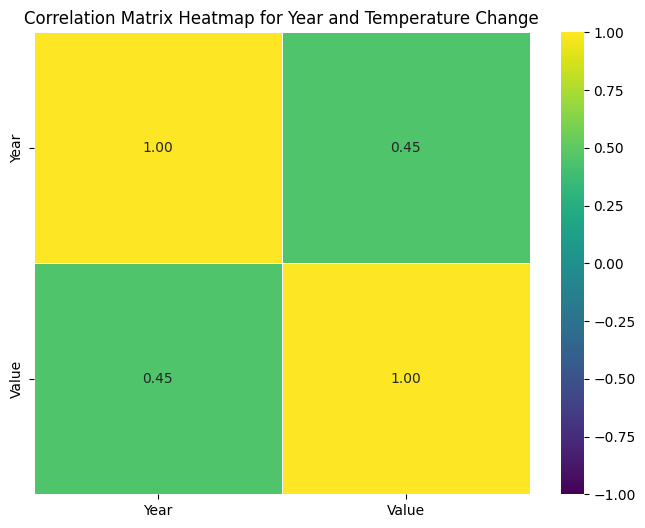

In [15]:
# Figure 2:

# Compute the correlation matrix for the numerical features
correlation_matrix = clean_data[['Year', 'Value']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap for Year and Temperature Change')

# Show the plot
plt.show()

**Figure 2:**

The plot shows the correlation matrix heatmap, which visualizes the strength and direction of relationships between the selected variables, year and temperature change, in the dataset. I can see that there is a moderate positive correlation (0.45) between Year and Value, which indicates that over time, temperature change generally increases, but the relationship is not strongly linear. This suggests that while there is some trend in temperature change, other factors might be influencing it, which could explain the weaker correlation.

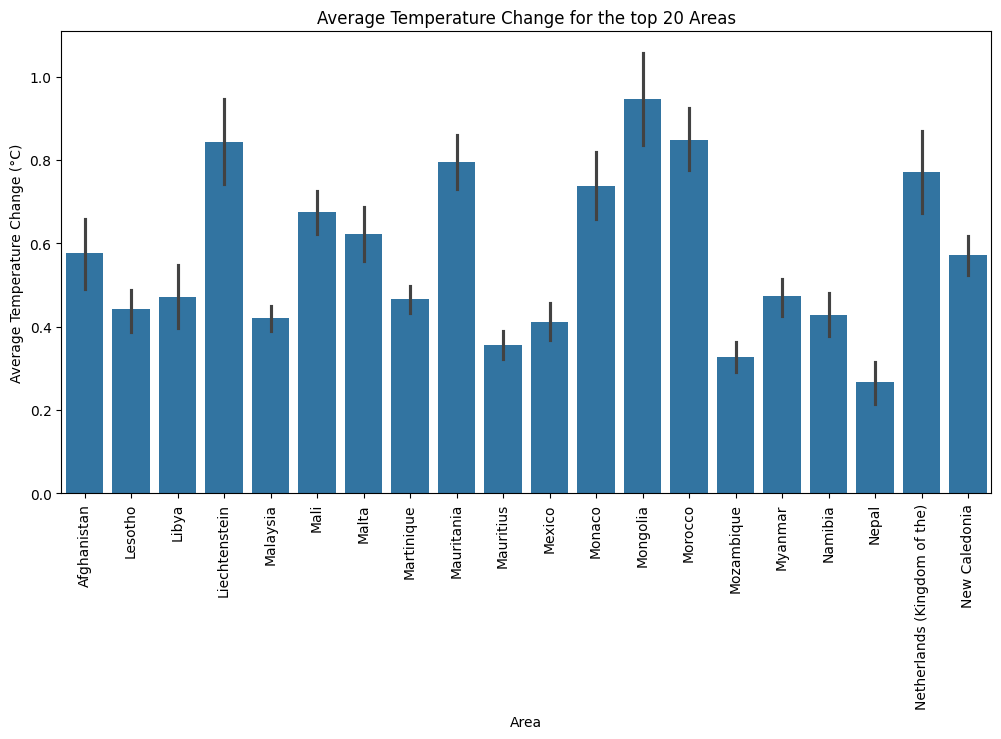

In [16]:
# Figure 3:

# Increase figure size
plt.figure(figsize=(12, 6))

# Create the bar plot and limit the x-axis to the top 20 areas with the most data
top_areas = clean_data['Area'].value_counts().head(20).index
sns.barplot(x='Area', y='Value', data=clean_data[clean_data['Area'].isin(top_areas)])

# Add title and labels
plt.title('Average Temperature Change for the top 20 Areas')
plt.xlabel('Area')
plt.ylabel('Average Temperature Change (°C)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Figure 3:**

The bar plot above shows the average temperature change across the top 20 areas in the dataset. It highlights significant variations in temperature changes, with areas like Mongolia, Morocco, and Liechtenstein showing the highest average temperature changes, while regions like Mauritius, Mozambique, and Nepal have the lowest averages. The error bars indicate variability in temperature changes within each area, with larger error bars suggesting greater uncertainty or spread in the data. This suggests that while some regions experience more pronounced temperature shifts, others show more stability or less fluctuation in temperature changes.

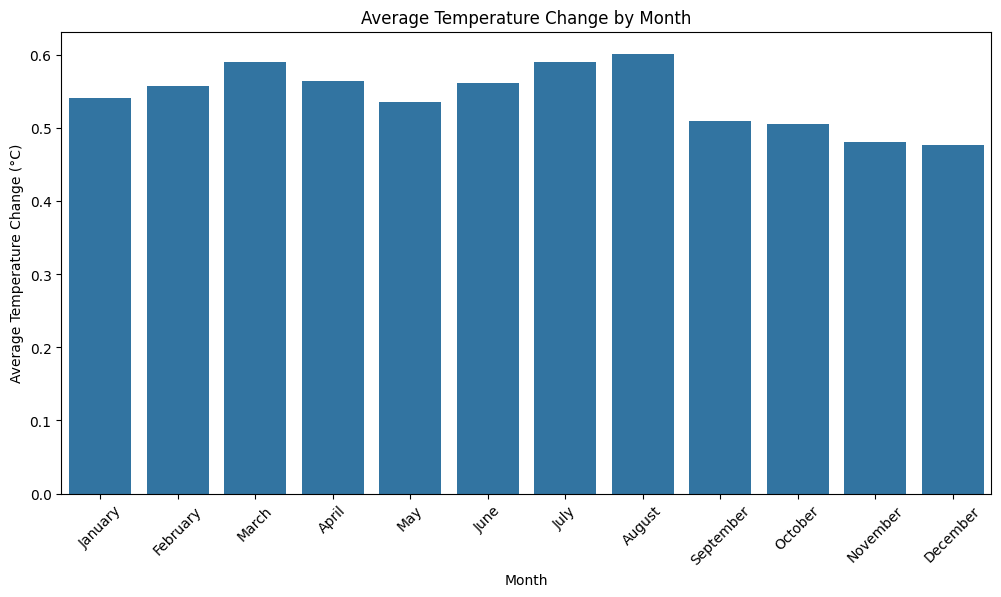

In [17]:
# Figure 4:

# Filter out the seasonal categories
clean_data_filtered = clean_data[~clean_data['Months'].isin(['Winter', 'Spring', 'Summer', 'Fall'])]

# Bar plot for average temperature change by Month (only standard months)
plt.figure(figsize=(12, 6))
sns.barplot(x='Months', y='Value', data=clean_data_filtered, errorbar=None)

# Add title and labels
plt.title('Average Temperature Change by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature Change (°C)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Figure 4:**

The bar plot above shows the average temperature change by month. The plot indicates that the temperature change is relatively consistent throughout the months of the year, with only slight variations. The average temperature change is approximately the same for each month, fluctuating between 0.5°C and 0.6°C. There are no extreme peaks or dips, suggesting that the temperature change is fairly stable across different months. This uniformity could imply that temperature changes are relatively consistent regardless of the season or time of the year in the dataset.



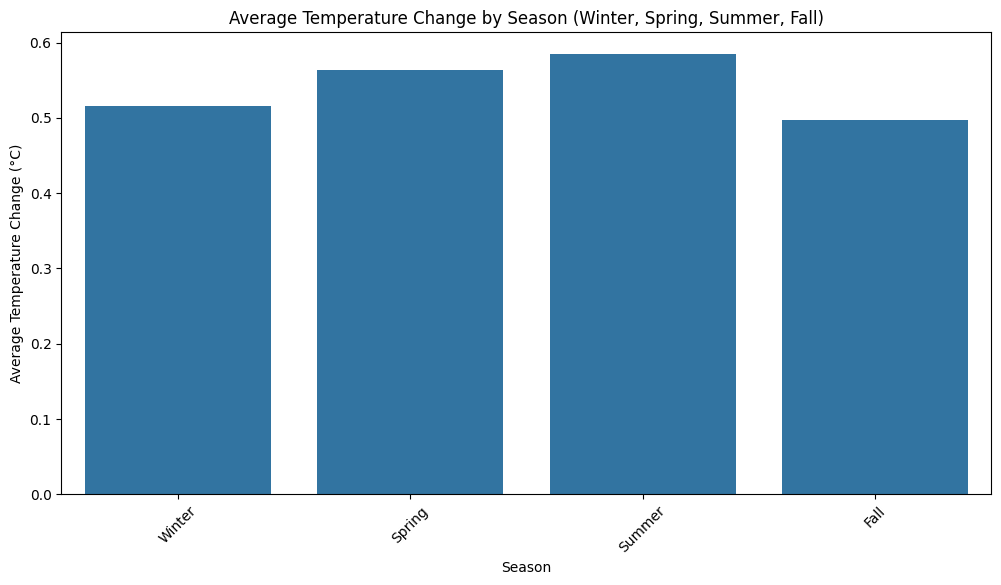

In [18]:
# Figure 5:

# Filter the data to include only Spring, Summer, Winter, and Fall
clean_data_seasons = clean_data[clean_data['Months'].isin(['Winter', 'Spring', 'Summer', 'Fall'])]

# Bar plot for average temperature change by Season (Winter, Spring, Summer, Fall)
plt.figure(figsize=(12, 6))
sns.barplot(x='Months', y='Value', data=clean_data_seasons, errorbar=None)

# Add title and labels
plt.title('Average Temperature Change by Season (Winter, Spring, Summer, Fall)')
plt.xlabel('Season')
plt.ylabel('Average Temperature Change (°C)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Figure 5:**

The bar plot above shows the average temperature change by season (Winter, Spring, Summer, and Fall). It reveals that Summer has the highest average temperature change, followed by Spring. Winter shows a slightly lower average temperature change, and Fall has the lowest of all seasons. Despite the small differences, the temperature changes are generally consistent across the seasons, with Summer leading the others by a slight margin. This suggests that temperature change is relatively stable throughout the year, although Summer experiences a slightly more significant shift compared to other seasons.

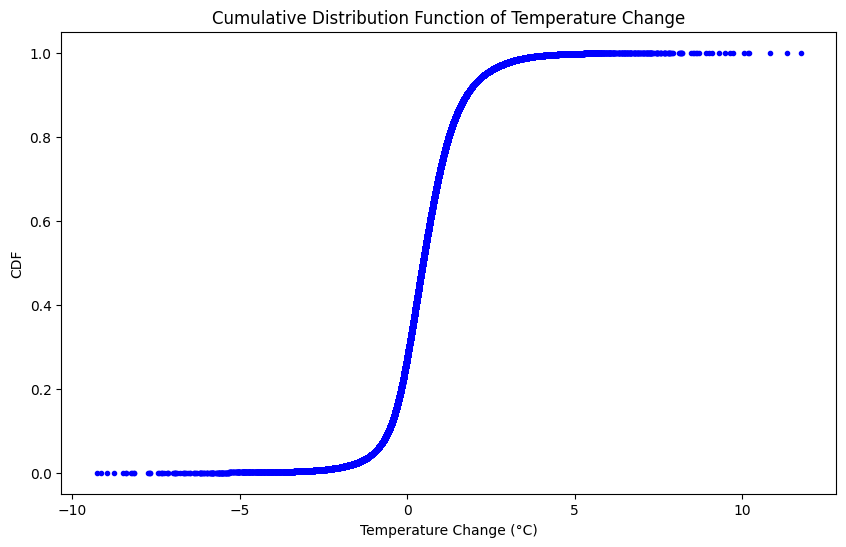

In [19]:
# Figure 6:

# Sort the data for the CDF plot
sorted_data = np.sort(clean_data['Value'])

# Calculate the CDF (Cumulative Distribution Function)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue')

# Add title and labels
plt.title('Cumulative Distribution Function of Temperature Change')
plt.xlabel('Temperature Change (°C)')
plt.ylabel('CDF')

# Show the plot
plt.show()

**Figure 6:**

The plot above is a CDF plot of the change in temperature. I can see that most of the data is clustered around small values, with the curve sharply rising after a certain point. It shows a steep increase in the cumulative probability around zero, indicating that most of the temperature changes are clustered around small values close to 0°C. The curve starts flat at low temperatures and then rises sharply, signifying that the majority of the observations fall within a narrow range. Beyond this point, the plot levels off as it approaches a cumulative probability of 1, suggesting that extreme temperature changes are rare. This distribution indicates that temperature changes are generally small, with a few outliers contributing to the tail on the right side. The CDF plot helps in understanding how the data is distributed across the observed range of temperature changes.